# Emotion Detection System using AVEC 2018

## I mapped valence and arousasal into the four emotion zones using this reference: 
```
    @article{tan2019automatic,
  title={Automatic music mood recognition using Russell’s twodimensional valence-arousal space from audio and lyrical data as classified using SVM and Na{\"\i}ve Bayes},
 author={Tan, KR and Villarino, ML and Maderazo, C},
  journal={MS\&E},
  volume={482},
  number={1},
  pages={012019},
  year={2019}
} ```
### Two dimensional valence-arousal space
![alt text](valence_arousal.png "Two dimensional valence-arousal space")

### I took some decisions when we find values over orthogonal axis 
1. the point (0,0) is green
2. the point (0,1) is yellow
3. the point (1,0) is green
4. the point (0,-1) is blue
5. the point (-1,0) is red 

Following the same logic, I defined that:
1. when the values rest on the valence axis (arousal value equals 0), 
  * If valence value is positive (valence greater than 0): green class 
  * Else (valence less than 0): red class 


2. when the values rest on the arousal axis (valence value equals 0), 
  * If arousal value is positive (arousal greater than 0): yellow class 
  * Else (arousal less than 0): blue class 

In [20]:
import glob
import pathlib
import os.path

import pandas as pd

path_annotation_emotions = '/Users/user/PycharmProjects/emotion_detection_system/labels/emotion_zones/emotion_names'
files = glob.glob(f"{path_annotation_emotions}/*.csv")
train_count = {'yellow': 0, 'red': 0, 'blue': 0, 'green': 0}
dev_count = {'yellow': 0, 'red': 0, 'blue': 0, 'green': 0}
for file in files:
    df_train = pd.read_csv(file)
    df_train['emotion_zone'].value_counts()
    count_emotions = df_train['emotion_zone'].value_counts()
    if 'train' in file:
        train_count['yellow'] += count_emotions['yellow']
        train_count['red'] += count_emotions['red']
        train_count['blue'] += count_emotions['blue']
        train_count['green'] += count_emotions['green']
    elif 'dev' in file:
        dev_count['yellow'] += count_emotions['yellow']
        dev_count['red'] += count_emotions['red']
        dev_count['blue'] += count_emotions['blue']
        dev_count['green'] += count_emotions['green']

## We then computed statistics to find emotion zones distribution into train and dev datasets. 

### Class Distribution within all train dataset

<BarContainer object of 4 artists>

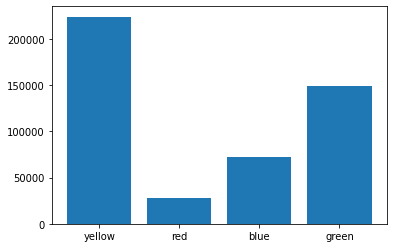

In [21]:
import matplotlib.pyplot as plt
keys = train_count.keys()
values = train_count.values()

plt.bar(keys, values)

### Class Distribution within all dev dataset

<BarContainer object of 4 artists>

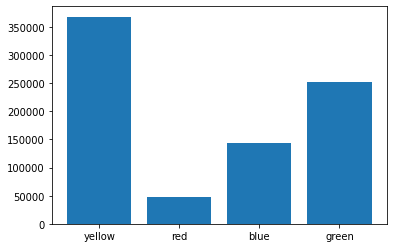

In [22]:
keys = dev_count.keys()
values = dev_count.values()

plt.bar(keys, values)

## Observations: 
1. both datasets follow the same distribution of classes. 
2. the classes are very unbalanced. With ```red``` being the one with less examples. 

## Problem: Defining what zero means 
How much close to zero can we consider a value as zero? This might make a lot of difference on the class distribution. e.g. 0.01 should be seen as zero? 